Primeras filas del dataset:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2

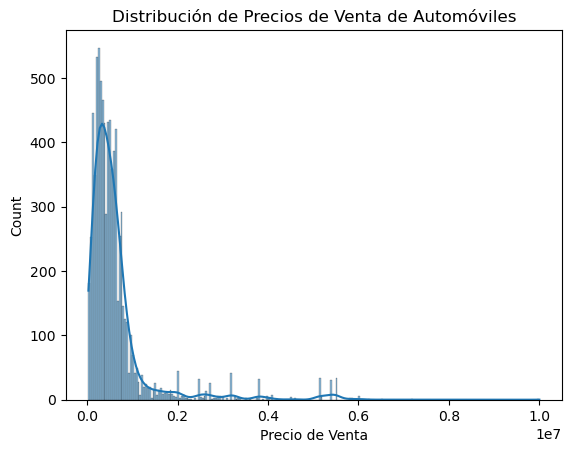

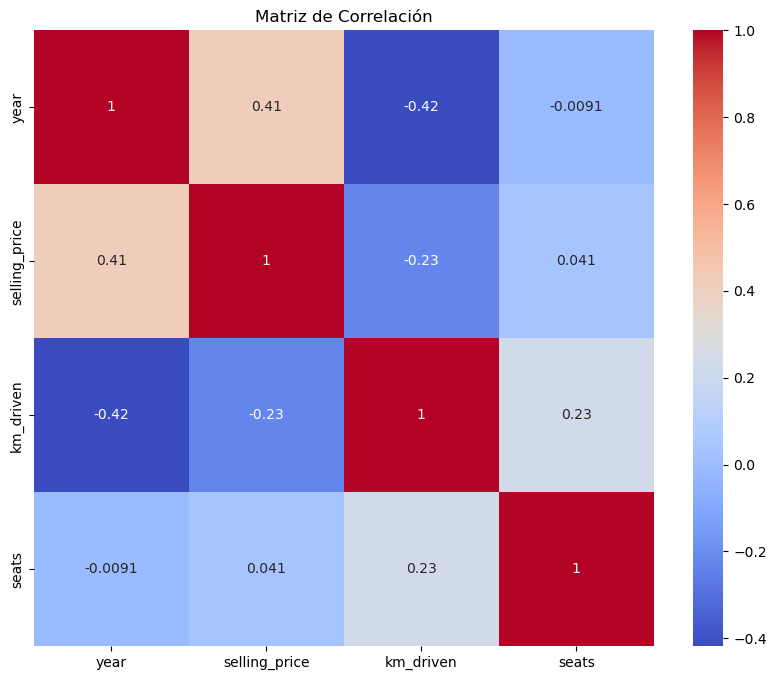

Mean Squared Error (Regresión Lineal): 349841524114.0478
R^2 Score (Regresión Lineal): 0.4968358154696155


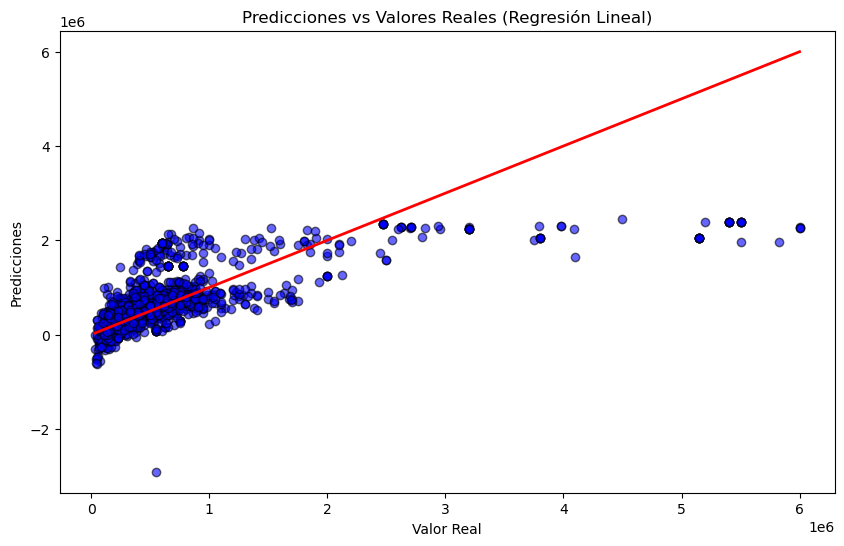


Coeficientes de Regresión Lineal:
               Coeficiente
year          4.617186e+04
km_driven    -1.242512e+00
fuel         -1.583599e+05
seller_type  -3.086247e+05
transmission -1.172197e+06
owner        -7.936319e+03
seats         3.897616e+04

Interpretación de Resultados:
Los coeficientes indican cómo cambia el precio de venta por cada unidad de cambio en las características seleccionadas.


In [2]:
# Importar bibliotecas necesarias  
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder  
from sklearn.feature_selection import SelectKBest, f_regression  

# Paso 1: Cargar el dataset desde la ruta especificada  
ruta_archivo = r'C:\Users\Mariano\Desktop\Analisi de datos\Tarea 3\Guía de actividades y rúbrica de evaluación - Unidad 2 - Tarea 3 - Algoritmos de Aprendizaje Supervi\Anexo 2 - Dataset Vehicle\Car details v3.csv'  
df = pd.read_csv(ruta_archivo)  

# Paso 2: Análisis exploratorio de datos (EDA)  
print("Primeras filas del dataset:")  
print(df.head())  
print("\nResumen estadístico:")  
print(df.describe())  
print("\nInformación general del dataset:")  
print(df.info())  

# Visualización de la distribución de precios  
sns.histplot(df['selling_price'], kde=True)  
plt.title('Distribución de Precios de Venta de Automóviles')  
plt.xlabel('Precio de Venta')  
plt.show()  

# Matriz de correlación para ver relaciones entre variables numéricas únicamente  
numerical_df = df.select_dtypes(include=[np.number])  # Filtra solo las columnas numéricas  
plt.figure(figsize=(10, 8))  
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')  
plt.title('Matriz de Correlación')  
plt.show()  

# Paso 3: Preprocesamiento de datos  
# Convertir variables categóricas en variables numéricas con LabelEncoder  
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']  
label_encoders = {}  
for col in categorical_cols:  
    le = LabelEncoder()  
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  

# Manejo de valores faltantes (si los hay)  
df = df.dropna()  

# Paso 4: Selección de características relevantes para la regresión  
X = df.drop(columns=['selling_price'], errors='ignore')  # Excluir 'selling_price'
y_linear = df['selling_price']  

# Asegurarse de que X solo contiene columnas numéricas
X_numeric = X.select_dtypes(include=[np.number])  

selector = SelectKBest(score_func=f_regression, k='all')  
selector.fit(X_numeric, y_linear)  
X_selected = X_numeric[X_numeric.columns[selector.get_support()]]  

# División de los datos en Train y Test  
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_selected, y_linear, test_size=0.2, random_state=42)  

# Paso 5: Entrenamiento del modelo de Regresión Lineal  
lin_model = LinearRegression()  
lin_model.fit(X_train_linear, y_train_linear)  

# Paso 6: Evaluación del modelo de Regresión Lineal  
y_pred_linear = lin_model.predict(X_test_linear)  
mse = mean_squared_error(y_test_linear, y_pred_linear)  
r2 = r2_score(y_test_linear, y_pred_linear)  

print(f'Mean Squared Error (Regresión Lineal): {mse}')  
print(f'R^2 Score (Regresión Lineal): {r2}')  

# Visualización de los resultados del modelo de Regresión Lineal  
plt.figure(figsize=(10, 6))  
plt.scatter(y_test_linear, y_pred_linear, color='blue', edgecolor='k', alpha=0.6)  
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], color='red', linewidth=2)  
plt.xlabel('Valor Real')  
plt.ylabel('Predicciones')  
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')  
plt.show()  

# Interpretación de resultados  
coef = pd.DataFrame(lin_model.coef_, X_selected.columns, columns=['Coeficiente'])  
print("\nCoeficientes de Regresión Lineal:")  
print(coef)  

# Paso 7: Documentación de resultados  
print("\nInterpretación de Resultados:")  
print("Los coeficientes indican cómo cambia el precio de venta por cada unidad de cambio en las características seleccionadas.")
